## Описание проекта<a id='parthead'></a>
#### Интернет-магазин «Стримчик», продажа компьютерных игр по всему миру.

* Из открытых источников доступны исторические данные о продажах игр, оценки пользователей и экспертов, жанры и платформы (например, Xbox или PlayStation). Нам нужно выявить определяющие успешность игры закономерности. Это позволит  сделать ставку на потенциально популярный продукт и спланировать рекламные кампании.
* Перед нами данные до 2016 года. 
* Представим, что сейчас декабрь 2016 г., и мы планируем кампанию на 2017-й. Нужно отработать принцип работы  с данными. Неважно, прогнозируем ли мы продажи на 2017 год по данным 2016-го или же 2027-й — по данным 2026 года.
* В наборе данных попадается аббревиатура ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр. ESRB оценивает игровой контент и присваивает ему подходящую возрастную категорию, например, «Для взрослых», «Для детей младшего возраста» или «Для подростков».

### Проект разделим на 6 частей


#### [Часть 1  Загрузка файлов, библиотек и изучение данных.](#part1)

* Загрузим библиотеки и файл с данными для анализа
* Описание данных
* Изучим наши данные
* [Вывод](#part11)


#### [Часть 2. Подготовка данных ](#part2)

* Приведем названия столбцов в нижний регистр.
* Обработаем столбец year_of_release
* Изучим столбец rating.
* Найдем расшифровку аббревиатуры ESRB и заменим NaN.
* Изучим столбцы user_score и critic_score.
* Проверим предобработаные данные на пропуски
* Создадим столбец с суммарными продажами summ_sales.
* [Вывод](#part21)


#### [Часть 3. Проведем исследовательский анализ данных ](#part3)

* Посмотрим, сколько игр выпускалось в разные годы.
* [Промежуточный вывод .:](#part301)
* Изучим продажи по платформам
* Отберем платформы с самым высоким показателем суммарных продаж
* [Промежуточный вывод 1](#part31)
* Сделаем срез по актуальному периоду 
* Построим график суммарных продаж по самым популярным платформам
* Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.
* Посмотрим на цифры sum, mean, median, count, min, max  продаж по платформам в актуальный период
* [Промежуточный вывод 2](#part32)
* Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков.
* Построим диаграммы рассеяния по солбцам critic_score и user_score
* Вычислим коэффициент корреляции Пирсона и построим матрицу диаграмм рассеяния
* [Промежуточный вывод 3](#part33)
* Сравним выводы с продажами игр на других платформах.
* [Промежуточный вывод 4](#part34)
* Посмотрим на общее распределение игр по жанрам. Выделим самые прибыльные жанры. 
* [Вывод](#part35)



#### [Часть 4. Составим портрет пользователя каждого региона ](#part4)

* Определим для пользователя каждого региона (NA, EU, JP): Самые популярные платформы (топ-5).
* [Промежуточный вывод 1](#part41)
* Определим для пользователя каждого региона (NA, EU, JP): Самые популярные жанры (топ-5).
* [Промежуточный вывод 2](#part42)
* Проверим влияние рейтинга ESRB на продажи в отдельном регионе.
* [Вывод](#part43)



#### [Часть 5. Проверим гипотезы](#part5)

* Проверим гипотезу что пользовательские рейтинги платформ Xbox One и PC одинаковые.
* [Промежуточный вывод 1](#part51)
* Проверим гипотезу что пользовательские рейтинги жанров Action  и Sports разные.
* [Вывод](#part52)


#### [Часть 6. Общий вывод:  ](#part6) 



[...](#parthead)

### Часть 1<a id='part1'></a>

#### Загрузим библиотеки и файл с данными для анализа

In [1]:
# загрузим библиотеки
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats as st
import numpy as np
from IPython.display import display
from pymystem3 import Mystem
m = Mystem() 
from collections import Counter
import datetime as dt
import seaborn as sns 
import plotly
import plotly.graph_objs as go
import plotly.express as px
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
import plotly
init_notebook_mode(connected=True)


# загрузим файлы с данными
data = pd.read_csv ('/datasets/games.csv')

Описание данных

Загруженные данные это таблица формата csv содержит 16715 строк и 11 столбцов, данные содержат информацию о количестве проданных игр для различных платформ и для разных регионов, также есть рейтинги: пользовательский, критиков и ESRB (Entertainment Software Rating Board) — это ассоциация, определяющая возрастной рейтинг компьютерных игр.

#### Изучим наши данные

In [2]:
display(data.head())
display(data.info())
display(data.describe())
display(data.isnull().sum())
display(data['Platform'].unique())
display(data['Genre'].unique())
display(data['Name'].unique())
display(data.shape)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
Name               16713 non-null object
Platform           16715 non-null object
Year_of_Release    16446 non-null float64
Genre              16713 non-null object
NA_sales           16715 non-null float64
EU_sales           16715 non-null float64
JP_sales           16715 non-null float64
Other_sales        16715 non-null float64
Critic_Score       8137 non-null float64
User_Score         10014 non-null object
Rating             9949 non-null object
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


None

,Year_of_Release,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score
count,16446.000000,16715.000000,16715.000000,16715.000000,16715.000000,8137.000000
mean,2006.484616,0.263377,0.145060,0.077617,0.047342,68.967679
std,5.877050,0.813604,0.503339,0.308853,0.186731,13.938165
min,1980.000000,0.000000,0.000000,0.000000,0.000000,13.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,60.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,71.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,79.000000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000


Name                  2
Platform              0
Year_of_Release     269
Genre                 2
NA_sales              0
EU_sales              0
JP_sales              0
Other_sales           0
Critic_Score       8578
User_Score         6701
Rating             6766
dtype: int64

array(['Wii', 'NES', 'GB', 'DS', 'X360', 'PS3', 'PS2', 'SNES', 'GBA',
       'PS4', '3DS', 'N64', 'PS', 'XB', 'PC', '2600', 'PSP', 'XOne',
       'WiiU', 'GC', 'GEN', 'DC', 'PSV', 'SAT', 'SCD', 'WS', 'NG', 'TG16',
       '3DO', 'GG', 'PCFX'], dtype=object)

array(['Sports', 'Platform', 'Racing', 'Role-Playing', 'Puzzle', 'Misc',
       'Shooter', 'Simulation', 'Action', 'Fighting', 'Adventure',
       'Strategy', nan], dtype=object)

array(['Wii Sports', 'Super Mario Bros.', 'Mario Kart Wii', ...,
       'Woody Woodpecker in Crazy Castle 5', 'LMA Manager 2007',
       'Haitaka no Psychedelica'], dtype=object)

(16715, 11)

#### Вывод:<a id='part11'></a>

* Столбцы содержат пустые значения Critic_Score, User_Score, Rating значения рейтинга вероятно не заполнены либо этим играм рейтинг не присваивался. Можно временно заменить на маяки пропущенных значений.    
* Названия столбцов в разных регистрах
* Тип столбца Year_of_Release - float должен быть datatime, вероятно ошибка техническая неверный перевод формата при обработке или операции копирования и парсинга, приведем к правильному типу данных, пропуски временно можно заменить на маяк пропущенных значений.
* Тип столбца User_Score - object должен быть float Возможно наличие строкового значения, необходимо посмотреть на уникальные значения.         

[...](#parthead)

### Часть 2<a id='part2'></a>

#### Приведем данные к правильным типам данных и изучим пропуски и найдем аномалии ошибки при наличии

Приведем названия столбцов в нижний регистр.

In [3]:
# переименуем столбцы в нижний регистр
data.rename(columns = {'Name':'name', 'Platform':'platform','Year_of_Release':'year_of_release','Genre':'genre','NA_sales':'na_sales',
                             'EU_sales':'eu_sales','JP_sales':'jp_sales','Other_sales':'other_sales','Critic_Score':'critic_score','User_Score':'user_score',
                               'Rating':'rating'}, inplace = True)

In [4]:
# приведем к нижнему регистру все строковые значения
data['name'] = data['name'].str.lower()
data['platform'] = data['platform'].str.lower()
data['genre'] = data['genre'].str.lower()

Обработаем столбец year_of_release

In [5]:
# смотрим на пропущенные значения
data['year_of_release'].isnull().sum()

269

Пропущенных значений не много, а так как нам неизвестны данные то строки удалим, чтобы они не искажали наш дальнейший анализ.
Также приведем данные столбца к типу DataTime

In [6]:
# заменим NaN на 1900 год (маяк пропущенного значения)
# удалим эти строки с 1900
# приведем столбец year_of_release к типу data так как тип был float64
# и оставим только обозначение года
data['year_of_release'].fillna(value=1900, inplace=True)
data = data.drop(data[data['year_of_release'] == 1900].index)
data['year_of_release'] = (pd.to_datetime(data['year_of_release'], yearfirst=True, format='%Y')).dt.year

#### Изучим столбец rating

In [7]:
display(data['rating'].unique())
display(data['rating'].value_counts())
display(data['rating'].isnull().sum())

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

E       3921
T       2905
M       1536
E10+    1393
EC         8
K-A        3
AO         1
RP         1
Name: rating, dtype: int64

6678

Найдем расшифровку аббревиатуры и заменим NaN

«EC» («Early childhood») — «Для детей младшего возраста»: Игра подходит для детей от 3 лет и старше и не содержит материалов, которые родители могли бы счесть неподходящими. Продукты, получившие данный рейтинг, изначально разрабатываются для детей и обычно представляют собой развивающие игры.

«K-A» = «E» - («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера.

«E10+» («Everyone 10 and older») — «Для всех от 10 лет и старше»: Проекты с данным рейтингом могут содержать немного больше мультипликационного или мягкого насилия, или несколько откровенные сцены или минимальное количество крови. 


«T» («Teen») — «Подросткам»: Игра подходит для лиц от 13 лет и старше. Проекты из данной категории могут содержать насилие, непристойные сцены, грубый юмор, в меру откровенное сексуальное содержимое, кровь или нечастое использование ненормативной лексики.

«M» («Mature») — «Для взрослых»: Материалы игры не подходят для подростков младше 17 лет. Проекты с данным рейтингом могут содержать достаточно жестокое насилие, большое количество крови с расчленением, непристойные сексуальные сцены или грубую ненормативную лексику, нежелательную для младшей аудитории.

«AO» («Adults Only 18+») — «Только для взрослых»: Содержание игры только для взрослых старше 18 лет. Продукты из данной категории могут содержать длительные сцены жестокого насилия и/или очень откровенное сексуальное содержимое, а также сцены с обнажением. 

«RP» («Rating Pending») — «Рейтинг ожидается»: Продукт был отправлен в ESRB и ожидает присвоения рейтинга. Данный логотип используется только на рекламных презентациях и в демо-версиях игр до официальной даты выпуска в продажу.

Значений NaN  довольно много 6766,  заменим NaN на "unknown" - 'UNKW',  вероятнее всего этим играм не присваивался рейтинг.

In [8]:
data['rating'].fillna(value='UNKW', inplace=True)

#### Изучим столбцы user_score и critic_score

In [9]:
display(data['user_score'].isnull().sum())
display(data['user_score'].unique())

display(data['critic_score'].isnull().sum())
display(data['critic_score'].unique())

6607

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

8463

array([76., nan, 82., 80., 89., 58., 87., 91., 61., 97., 95., 77., 88.,
       83., 94., 93., 85., 86., 98., 96., 90., 84., 73., 74., 78., 92.,
       71., 72., 68., 62., 49., 67., 81., 66., 56., 79., 70., 59., 64.,
       75., 60., 63., 69., 50., 25., 42., 44., 55., 48., 57., 29., 47.,
       65., 54., 20., 53., 37., 38., 33., 52., 30., 32., 43., 45., 51.,
       40., 46., 39., 34., 41., 36., 31., 27., 35., 26., 19., 28., 23.,
       24., 21., 17., 13.])

Есть NaN  и 'tbd' - TBD - аббревиатура от английского To Be Determined (будет определено), то есть рейтинг еще в процессе определения, поэтому  заменим на -11 маяк,  а NaN заменим на -1 для дальнейшей обработки и принятия или не принятия решения поменять эти маяки на подходящие значения, просто на 0 менять не верно так как отсутствие значения рейтинга не означает что рейтинг игры 0

In [10]:
data.loc[data['user_score'] == 'tbd', 'user_score'] = -11
data['user_score'] = data['user_score'].astype('float64')
data['user_score'].fillna(value=-1, inplace=True)

Аналогично поступим и со столбцом critic_score - маяк -111

In [11]:
data['critic_score'].fillna(value=-111, inplace=True)

Дальнейший анализ предполагает работу с рейтингами, брать медиану либо среднее мы не можем это абсолютно некорректно.
Пропущенные значения рейтингов являются невосполнимыми и приведут к неверным результатам

In [12]:
# data = data.drop(data[data['user_score'] == -11].index)
# data = data.drop(data[data['user_score'] == -1].index)
# data = data.drop(data[data['critic_score'] == -111].index)

Проверим предобработаные данные на пропуски

In [13]:
display(data.head())
display(data.info())
display(data.describe())
display(data.isnull().sum())

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
0,wii sports,wii,2006,sports,41.36,28.96,3.77,8.45,76.0,8.0,E
1,super mario bros.,nes,1985,platform,29.08,3.58,6.81,0.77,-111.0,-1.0,UNKW
2,mario kart wii,wii,2008,racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,wii sports resort,wii,2009,sports,15.61,10.93,3.28,2.95,80.0,8.0,E
4,pokemon red/pokemon blue,gb,1996,role-playing,11.27,8.89,10.22,1.00,-111.0,-1.0,UNKW


<class 'pandas.core.frame.DataFrame'>
Int64Index: 16446 entries, 0 to 16714
Data columns (total 11 columns):
name               16444 non-null object
platform           16446 non-null object
year_of_release    16446 non-null int64
genre              16444 non-null object
na_sales           16446 non-null float64
eu_sales           16446 non-null float64
jp_sales           16446 non-null float64
other_sales        16446 non-null float64
critic_score       16446 non-null float64
user_score         16446 non-null float64
rating             16446 non-null object
dtypes: float64(6), int64(1), object(4)
memory usage: 1.5+ MB


None

,year_of_release,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score
count,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000,16446.000000
mean,2006.484616,0.264089,0.145945,0.078479,0.047593,-23.629515,1.242904
std,5.877050,0.818416,0.506696,0.311082,0.187994,90.482791,6.356585
min,1980.000000,0.000000,0.000000,0.000000,0.000000,-111.000000,-11.000000
25%,2003.000000,0.000000,0.000000,0.000000,0.000000,-111.000000,-1.000000
50%,2007.000000,0.080000,0.020000,0.000000,0.010000,-111.000000,-1.000000
75%,2010.000000,0.240000,0.110000,0.040000,0.030000,70.000000,7.300000
max,2016.000000,41.360000,28.960000,10.220000,10.570000,98.000000,9.700000


name               2
platform           0
year_of_release    0
genre              2
na_sales           0
eu_sales           0
jp_sales           0
other_sales        0
critic_score       0
user_score         0
rating             0
dtype: int64

#### Создадим столбец с суммарными продажами summ_sales

In [14]:
data['summ_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

#### Вывод:<a id='part21'></a>

* Много пропущенных значений в столбцах рейтингов.
* Удалили пропуски в данных рейтингов.
* В рейтинге ESRB пропуски заменили на UNKW.
* Пропуски в названиях и жанрах на unknown.
* Добавили столбец с суммой продаж по всем регионам.

[...](#parthead)

### Часть 3<a id='part3'></a>

#### Посмотрим, сколько игр выпускалось в разные годы. 

Сгруппируем по годам 

In [15]:
years_data = data.groupby('year_of_release')['name'].count().reset_index()

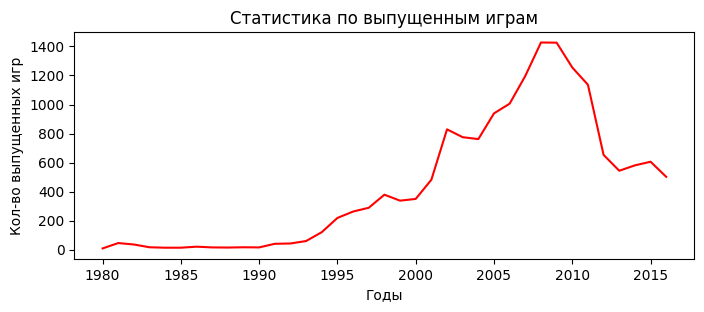

In [16]:
# построим график количества выпущенных игр по годам
# переименуем name в number_of_games в нашей группировке    
years_data.columns = ['year_of_release','number_of_games']

plt.figure(figsize=(8,3), dpi=100)

year_games = sns.lineplot(x=years_data.year_of_release, y=years_data.number_of_games,  color='red')
year_games.set_xlabel('Годы')
year_games.set_ylabel('Кол-во выпущенных игр')
plt.title('Статистика по выпущенным играм', fontsize=12)
plt.show()
plt.close()

#### Промежуточный вывод .:<a id='part301'></a>

Видим что в период с 1980 по 2002 год выпущенных крайне мало. Пик популярности пришелся на период с 2003 по 2007 потом пошел спад. Скорее всего связано с развитием мобильных платформ (телефоны, планшеты) и игр на их основе.

#### Изучим продажи по платформам

Сгруппируем данные по названию платформ и суммарными продажами

In [17]:
sum_data = data.groupby('platform')['summ_sales'].sum().reset_index()
sum_data = sum_data.sort_values('summ_sales', ascending=True)

Построим график суммарных продаж по платформам

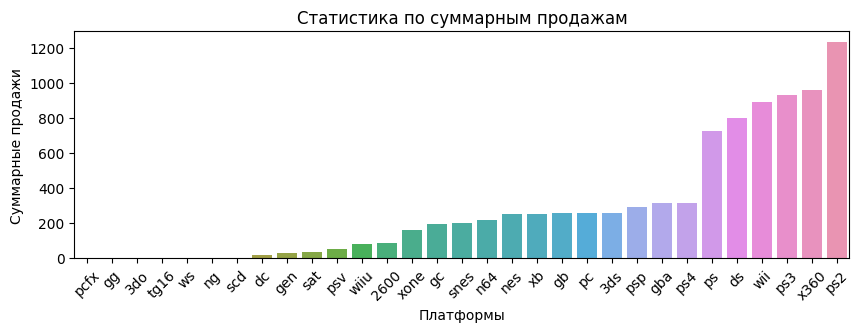

In [18]:
# построим график суммарных продаж игр
sum_data.columns = ['platform','sales_summary']

plt.figure(figsize=(10,3), dpi=100)

sales_games = sns.barplot(x=sum_data.platform, y=sum_data.sales_summary)
sales_games.set_xlabel('Платформы')
sales_games.set_ylabel('Суммарные продажи')
plt.title('Статистика по суммарным продажам', fontsize=12)
plt.xticks(rotation=45)
plt.show()
plt.close()


По данным и графику видно что лидеры продаж это 'ps2', 'x360', 'wii', 'ps3', 'ds', 'ps', 'ps4', 'xb'

Отберем платформы с самым высоким показателем суммарных продаж

In [19]:
# список для среза
list_for_query = ['ps2', 'x360', 'wii', 'ps3', 'ds', 'ps', 'ps4', 'xb']

best_platforms = data.query('platform == @list_for_query')

Посмотрим на суммарные продажи по годам и платформам

In [20]:
# создаем сводную таблицу
data_best_pivot = best_platforms.pivot_table(index='year_of_release', columns='platform',
                                   values='summ_sales', aggfunc='sum').reset_index()
# меняем NaN на пробел для наглядности
data_best_pivot.fillna(value='', inplace=True)
# выводим на экран
display(data_best_pivot)

platform,year_of_release,ds,ps,ps2,ps3,ps4,wii,x360,xb
0,1985,0.02,,,,,,,
1,1994,,6.03,,,,,,
2,1995,,35.96,,,,,,
3,1996,,94.7,,,,,,
4,1997,,136.17,,,,,,
5,1998,,169.49,,,,,,
6,1999,,144.53,,,,,,
7,2000,,96.37,39.17,,,,,0.99
8,2001,,35.59,166.43,,,,,22.26
9,2002,,6.67,205.38,,,,,48.01


Построим графики с помощью цикла для платформ с высокими показателями продаж по годам

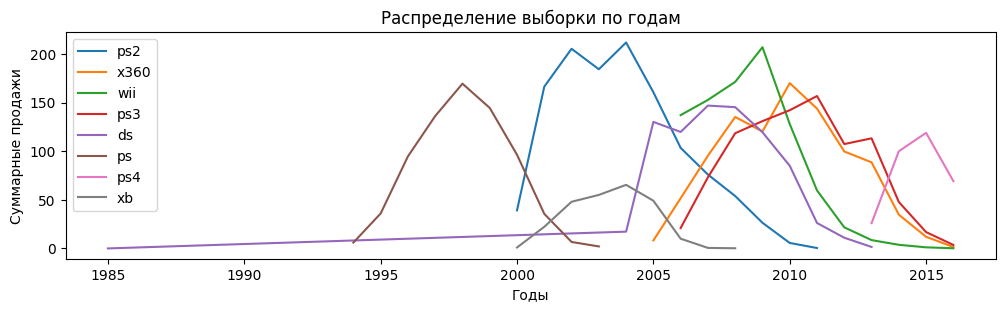

In [21]:
plt.figure(figsize=(12,3), dpi=100)

# цикл для построения графиков
for x in list_for_query:
        var_for_gr = (data.query('platform == @x').pivot_table(index='year_of_release', values='summ_sales', aggfunc='sum'))
        var_for_gr.reset_index(inplace=True)
        
        sns.lineplot(data=var_for_gr, x='year_of_release', y='summ_sales', sizes=(3, 6), label=x)
        plt.legend()
        plt.xlabel('Годы')
        plt.ylabel('Суммарные продажи')
        plt.title('Распределение выборки по годам')
    
plt.show()

#### Промежуточный вывод 1.:<a id='part31'></a>

* График распределения по платформам с высокими показателями продаж показал что характерный срок "жизни" платформы около ~7-10 лет, после чего продажи становятся минимальными либо вообще отсутствуют.
* Платформы с окончанием цикла востребованости до 2013 не стоит включать в анализ, так как они являются неактуальными
* Таблица с расчетными данными показывает что выбросов данных по продолжительности нет.

Сделаем срез по актуальному периоду с 2014 по 2016 

In [22]:
data_hiperiod = data.query('2014 <= year_of_release <= 2016')

Построим график суммарных продаж по  платформам за  период c 2014 по 2016 для выявления перспективных платформ

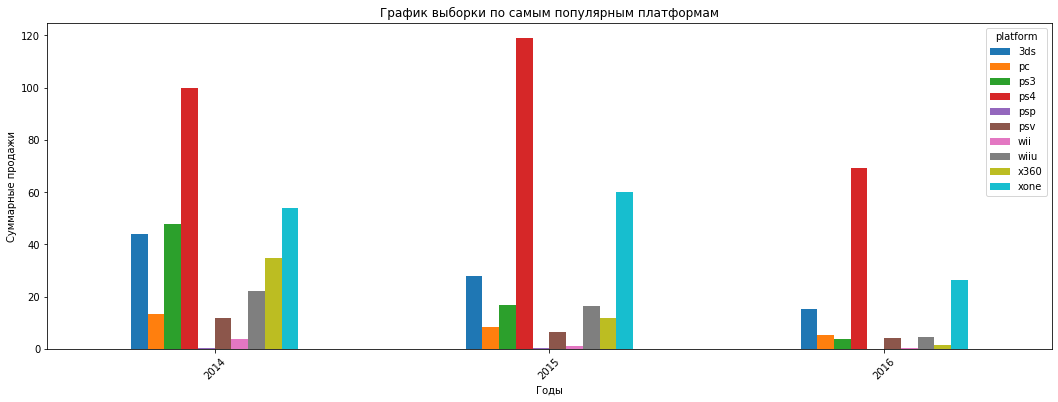

In [23]:
# создадим сводную таблицу с группировкой по году и платформе

data_hiperiod_pivot = data_hiperiod.pivot_table(index='year_of_release',
                          columns='platform', values='summ_sales', aggfunc='sum')

data_hiperiod_pivot.plot(figsize=(18,6), kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Годы')
plt.ylabel('Суммарные продажи')
plt.title('График выборки по самым популярным платформам')
plt.show()

В период с 2014 по 2016 график распределения показывает нам популярные платформы **pc, 3ds, wiiu, xone, ps4**



Построим график «ящик с усами» по глобальным продажам игр в разбивке по платформам.

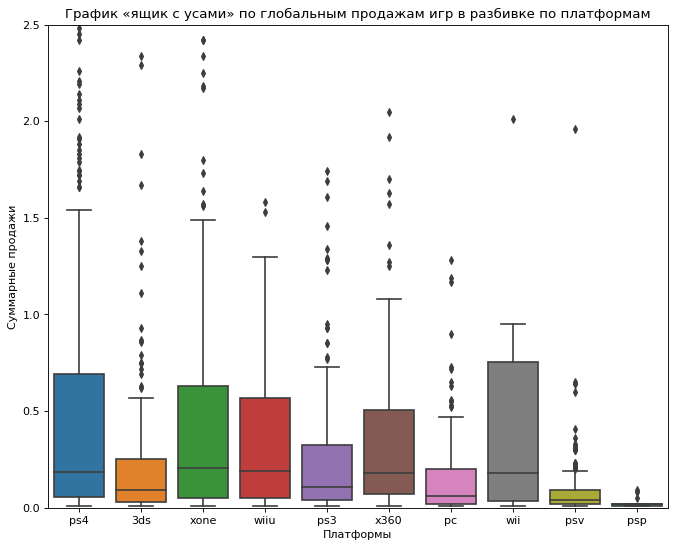

In [24]:
# рисуем ящик с усами 
plt.figure(figsize=(10,8), dpi= 80)
sns.boxplot(x='platform', y='summ_sales',  data=data_hiperiod)
 
# рисуем график
plt.title('График «ящик с усами» по глобальным продажам игр в разбивке по платформам', fontsize=12)
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи')
plt.ylim(0, 2.5)
plt.show()


Посмотрим на цифры sum, mean, median, count, min, max  продаж по платформам в актуальный период

In [25]:
data_hiperiod_group = data_hiperiod.pivot_table(index='platform',
                                                values='summ_sales', aggfunc=['sum', 'mean', 'median', 'count','min', 'max']).reset_index()


display(data_hiperiod_group)   

,platform,sum,mean,median,count,min,max
,,summ_sales,summ_sales,summ_sales,summ_sales,summ_sales,summ_sales
0,3ds,86.68,0.408868,0.090,212,0.01,11.68
1,pc,27.05,0.179139,0.060,151,0.01,3.05
2,ps3,68.18,0.311324,0.110,219,0.01,5.27
3,ps4,288.15,0.766356,0.185,376,0.01,14.63
4,psp,0.36,0.027692,0.020,13,0.01,0.09
5,psv,22.40,0.075932,0.040,295,0.01,1.96
6,wii,5.07,0.460909,0.180,11,0.01,2.01
7,wiiu,42.98,0.588767,0.190,73,0.01,7.09
8,x360,48.22,0.434414,0.180,111,0.01,4.28


#### Промежуточный вывод 2.:<a id='part32'></a>

* "Ящик с усами" и сводная таблица показали  что  платтформы: xone, ps4, x360, wiiu, 3ds имеют  межквартильный размах больше чем у других платформ. Видны незначительные выбросы " значений. Наибольшее максимальное значение у платформы xone. 
* Популярность платформ напрямую зависит от самой платформы от его производителя и соотвественно от потребительских качеств, следом уже идут продажи игр к ним.

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Построим диаграмму рассеяния и посчитаем корреляцию между отзывами и продажами. 

Возьмем для иследования платформу x360

In [26]:
data_x360 = data.query('platform == "x360"')

Дальнейший анализ предполагает работу с рейтингами, брать медиану либо среднее мы не можем это абсолютно некорректно.
Пропущенные значения рейтингов являются невосполнимыми и приведут к неверным результатам

Удалим наши маяки-маркеры пропусков(-1, -11, -111)

In [27]:
data_x360 = data_x360.drop(data_x360[data_x360['user_score'] == -11].index)
data_x360 = data_x360.drop(data_x360[data_x360['user_score'] == -1].index)
data_x360 = data_x360.drop(data_x360[data_x360['critic_score'] == -111].index)

Построим диаграммы рассеяния по солбцам critic_score и user_score

In [28]:
# создаем сводную таблицу 
data_x360_pivot = data_x360.pivot_table(index=['critic_score', 'user_score'], values='summ_sales', aggfunc='sum').reset_index()

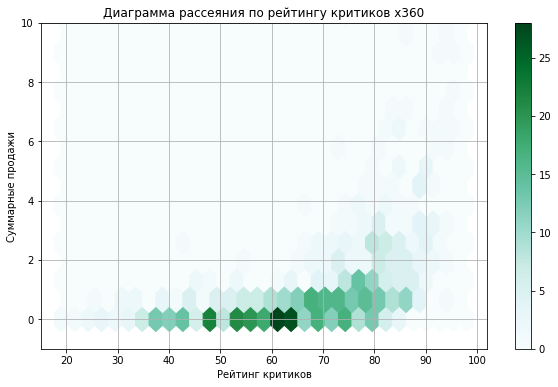

In [29]:
data_x360_pivot.plot(x='critic_score', y='summ_sales', ylim=(-1,10), kind='hexbin', gridsize=30, figsize=(10, 6), sharex=False, grid=True)
plt.title('Диаграмма рассеяния по рейтингу критиков x360', fontsize=12)
plt.xlabel('Рейтинг критиков')
plt.ylabel('Суммарные продажи')
plt.show()

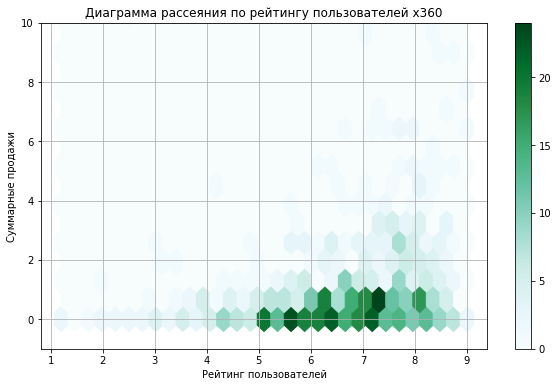

In [30]:
data_x360_pivot.plot(x='user_score', y='summ_sales', ylim=(-1,10), kind='hexbin', gridsize=30, figsize=(10, 6), sharex=False, grid=True)
plt.title('Диаграмма рассеяния по рейтингу пользователей x360', fontsize=12)
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Суммарные продажи')
plt.show()

Вычислим коэффициент корреляции Пирсона и построим матрицу диаграмм рассеяния

In [31]:
# коэффициент корреляции Пирсона
display(data_x360_pivot.corr().style.background_gradient('coolwarm'))

,critic_score,user_score,summ_sales
critic_score,1,0.596459,0.453808
user_score,0.596459,1,0.17695
summ_sales,0.453808,0.17695,1


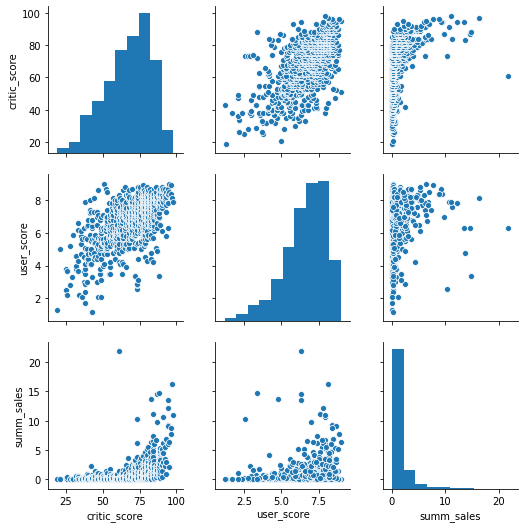

In [32]:
# матрица диаграмм рассеяния
sns.pairplot(data_x360_pivot)
plt.show()

#### Промежуточный вывод 3.:<a id='part33'></a>

* Диаграммы рассеяния по рейтингу критиков и пользователей показывают зависимость количества продаж от высоких оценок, чем выше оценка тем больше сумма продаж. 
* Коэффициент корреляции Пирсона показывает большую зависимость количества продаж от высоких оценок **критиков** *0.453099*, чем зависимость от оценок **пользователей** *0.177932*
* Большинство оценок критиков лежит в диапазоне ~ от 55 до 80, оценки пользователей лежат в диапазоне ~ от 5.5 до 8.

Сравним выводы с продажами игр на других платформах.

In [33]:
# изучим два среза по платформам ps3 wii
data_ps3 = data.query('platform == "ps3"')
data_xone = data.query('platform == "xone"')


Удалим наши маяки-маркеры пропусков(-1, -11, -111)

In [34]:
data_ps3 = data_ps3.drop(data_ps3[data_ps3['user_score'] == -11].index)
data_ps3 = data_ps3.drop(data_ps3[data_ps3['user_score'] == -1].index)
data_ps3 = data_ps3.drop(data_ps3[data_ps3['critic_score'] == -111].index)

data_xone = data_xone.drop(data_xone[data_xone['user_score'] == -11].index)
data_xone = data_xone.drop(data_xone[data_xone['user_score'] == -1].index)
data_xone = data_xone.drop(data_xone[data_xone['critic_score'] == -111].index)

In [35]:
# создаем сводные таблицы
data_ps3_pivot = data_ps3.pivot_table(index=['critic_score', 'user_score'], values='summ_sales', aggfunc='sum').reset_index()
data_xone_pivot = data_xone.pivot_table(index=['critic_score', 'user_score'], values='summ_sales', aggfunc='sum').reset_index()

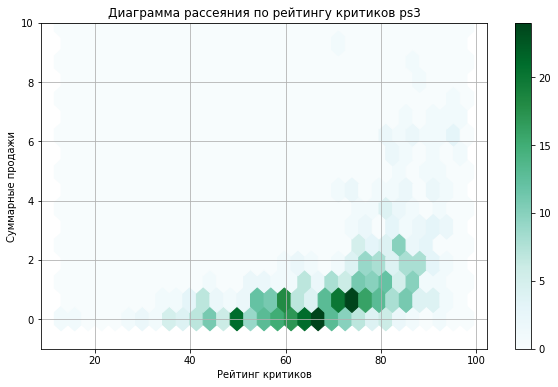

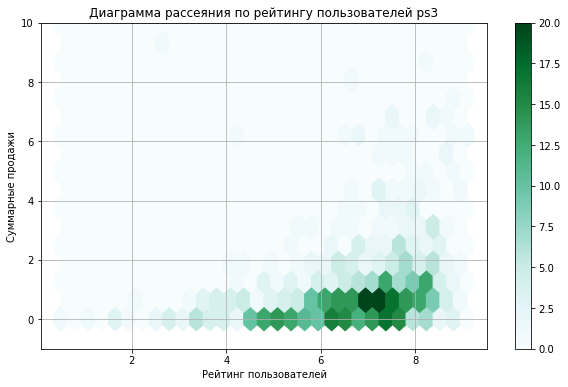

In [36]:
# строим диаграммы для платформы ps3
# диаграмма рассеяния по рейтингу критиков
data_ps3_pivot.plot(x='critic_score', y='summ_sales', ylim=(-1,10), kind='hexbin', gridsize=30, figsize=(10, 6), sharex=False, grid=True)
plt.title('Диаграмма рассеяния по рейтингу критиков ps3', fontsize=12)
plt.xlabel('Рейтинг критиков')
plt.ylabel('Суммарные продажи')
plt.show()
# диаграмма рассеяния по рейтингу пользователей
data_ps3_pivot.plot(x='user_score', y='summ_sales', ylim=(-1,10), kind='hexbin', gridsize=30, figsize=(10, 6), sharex=False, grid=True)
plt.title('Диаграмма рассеяния по рейтингу пользователей ps3', fontsize=12)
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Суммарные продажи')
plt.show()

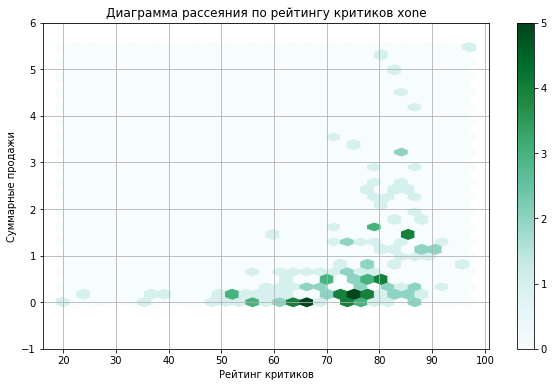

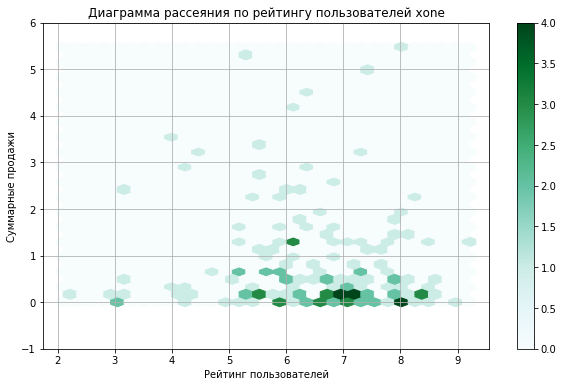

In [37]:
# строим диаграммы для платформы xone
# диаграмма рассеяния по рейтингу критиков
data_xone_pivot.plot(x='critic_score', y='summ_sales', ylim=(-1,6), kind='hexbin', gridsize=30, figsize=(10, 6), sharex=False, grid=True)
plt.title('Диаграмма рассеяния по рейтингу критиков xone', fontsize=12)
plt.xlabel('Рейтинг критиков')
plt.ylabel('Суммарные продажи')
plt.show()
# диаграмма рассеяния по рейтингу пользователей
data_xone_pivot.plot(x='user_score', y='summ_sales', ylim=(-1,6), kind='hexbin', gridsize=30, figsize=(10, 6), sharex=False, grid=True)
plt.title('Диаграмма рассеяния по рейтингу пользователей xone', fontsize=12)
plt.xlabel('Рейтинг пользователей')
plt.ylabel('Суммарные продажи')
plt.show()

In [38]:
# коэффициент корреляции Пирсона
print('Корреляция по платформе ps3')
display(data_ps3_pivot.corr().style.background_gradient('coolwarm'))
print('----------------------------------------------')
print('Корреляция по платформе wii')
display(data_xone_pivot.corr().style.background_gradient('coolwarm'))

Корреляция по платформе ps3


,critic_score,user_score,summ_sales
critic_score,1,0.619551,0.476894
user_score,0.619551,1,0.20324
summ_sales,0.476894,0.20324,1


----------------------------------------------
Корреляция по платформе wii


,critic_score,user_score,summ_sales
critic_score,1,0.463323,0.420686
user_score,0.463323,1,-0.0689088
summ_sales,0.420686,-0.0689088,1


#### Промежуточный вывод 4.:<a id='part34'></a>

Соотнесем продажи игр на платформе x360 с wii и ps3: 

*  Видим что зависимость от оценки критиков так же больше чем зависимость от рейтинга пользователей. Разница почти в 2 раза между корреляцией рейтинга критиков и пользователей. 
*  Зависимость продаж от рейтинга критиков лежит в диапазоне ~ от 45 до 80, оценки пользователей лежат в диапазоне ~ от 5.5 до 8.5.
*  Корреляция Пирсона показывает что корреляция больше по платформе ps3 чем wii. Корреляция по x360 и ps3 близки по значениям.

Посмотрим на общее распределение игр по жанрам. Выделим самые прибыльные жанры. 

In [39]:
data_genre = data_hiperiod.pivot_table(index=['genre'], values='summ_sales', aggfunc='sum')

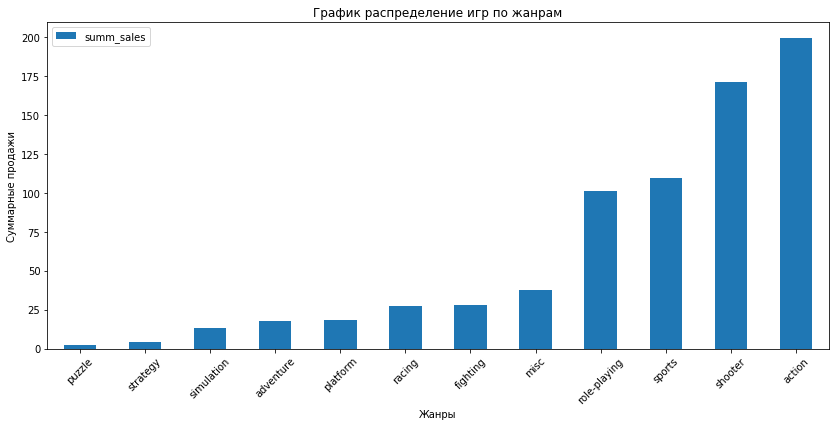

In [40]:
# сортируем по сумме выпущенных игр
data_genre = data_genre.sort_values('summ_sales')
# рисуем график
data_genre.plot(figsize=(14,6), kind='bar')
plt.xticks(rotation=45)
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи')
plt.title('График распределение игр по жанрам')
plt.show()

#### Вывод:<a id='part35'></a>

* Топ-5 популярных жанров:  racing, role-playing, sports, shooter, action
* 5 менее популярных жанров: simulation, misc, strategy, adventure, puzzle.


[...](#parthead)

### Часть 4. Составим портрет пользователя каждого региона<a id='part4'></a>

Определим для пользователя каждого региона (NA, EU, JP):
Самые популярные платформы (топ-5). 

In [41]:
data_top_platform_NA = data_hiperiod.pivot_table(index=['platform'], values='na_sales', aggfunc='sum').reset_index()
data_top_platform_EU = data_hiperiod.pivot_table(index=['platform'],  values='eu_sales', aggfunc='sum').reset_index()
data_top_platform_JP = data_hiperiod.pivot_table(index=['platform'],  values='jp_sales', aggfunc='sum').reset_index()

data_top_platform_NA = data_top_platform_NA.sort_values('na_sales')
data_top_platform_EU = data_top_platform_EU.sort_values('eu_sales')
data_top_platform_JP = data_top_platform_JP.sort_values('jp_sales')

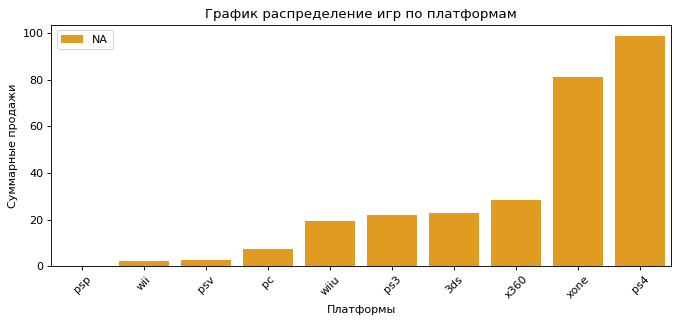

In [42]:
plt.figure(figsize=(10,4), dpi= 80)
sns.barplot(x='platform', y='na_sales', data=data_top_platform_NA, color='orange', label='NA')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи')
plt.title('График распределение игр по платформам')
plt.show()

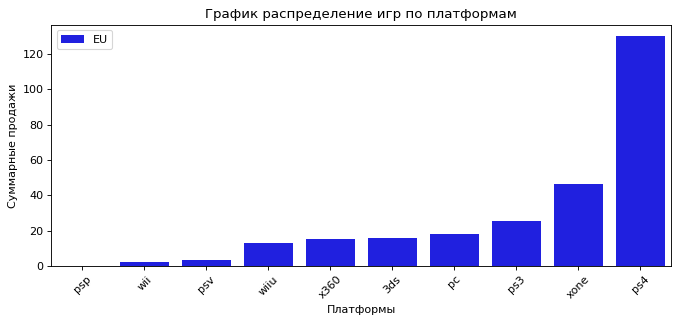

In [43]:
plt.figure(figsize=(10,4), dpi= 80)

sns.barplot(x='platform', y='eu_sales', data=data_top_platform_EU, color='blue', label='EU')

plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи')
plt.title('График распределение игр по платформам')
plt.show()

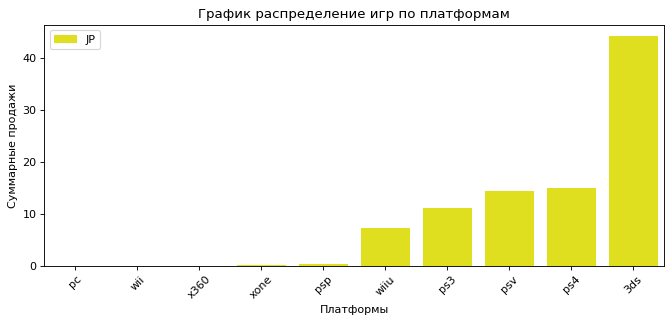

In [44]:
plt.figure(figsize=(10,4), dpi= 80)

sns.barplot(x='platform', y='jp_sales', data=data_top_platform_JP, color='yellow', label='JP')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Платформы')
plt.ylabel('Суммарные продажи')
plt.title('График распределение игр по платформам')
plt.show()

#### Промежуточный вывод 1.:<a id='part41'></a>

* Топ 5 платформ для региона NA: **ps3, 3ds, x360, xone, ps4**
* Топ 5 платформ для региона EU: **3ds, pc, ps3, xone, ps4**
* Топ 5 платформ для региона JP: **wiiu, ps3, psv, ps4, 3ds**
* В регионах лидеры разные, для Северной Америки это **ps4**, для Европы **ps4**, для Японии **3ds**
* Платформа ps4 популярная в регионах EU и NA с большим отрывом от других платформ
* Доля продаж  для Японии и Европы и Северной Америки различается в несколько раз. Сказывается меньшее число жителей и соответсвенно меньшее число пользователей платформ в Японии.

Определим для пользователя каждого региона (NA, EU, JP): Самые популярные жанры (топ-5).

In [45]:
data_top_genre_NA = data_hiperiod.pivot_table(index=['genre'], values='na_sales', aggfunc='sum').reset_index()
data_top_genre_EU = data_hiperiod.pivot_table(index=['genre'],  values='eu_sales', aggfunc='sum').reset_index()
data_top_genre_JP = data_hiperiod.pivot_table(index=['genre'],  values='jp_sales', aggfunc='sum').reset_index()

data_top_genre_NA = data_top_genre_NA.sort_values('na_sales')
data_top_genre_EU = data_top_genre_EU.sort_values('eu_sales')
data_top_genre_JP = data_top_genre_JP.sort_values('jp_sales')

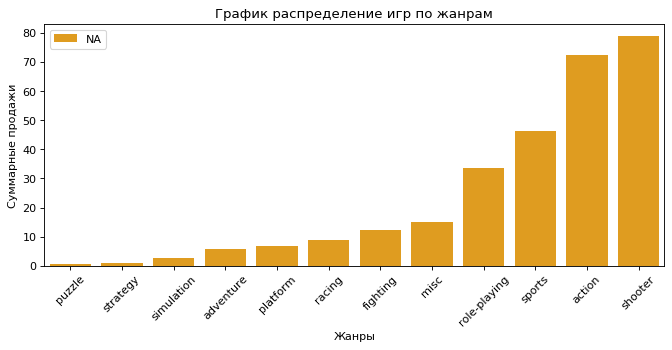

In [46]:
plt.figure(figsize=(10,4), dpi= 80)
sns.barplot(x='genre', y='na_sales', data=data_top_genre_NA, color='orange', label='NA')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи')
plt.title('График распределение игр по жанрам')
plt.show()


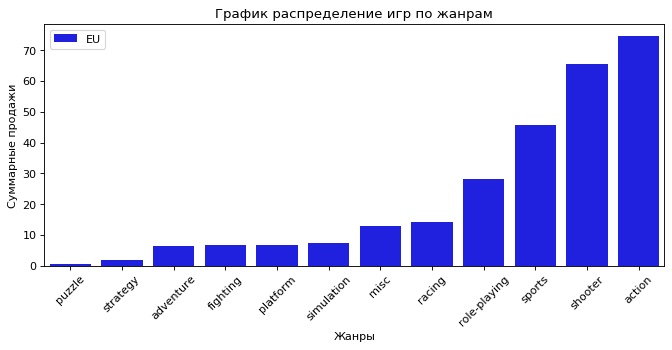

In [47]:
plt.figure(figsize=(10,4), dpi= 80)
sns.barplot(x='genre', y='eu_sales', data=data_top_genre_EU, color='blue', label='EU')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи')
plt.title('График распределение игр по жанрам')
plt.show()

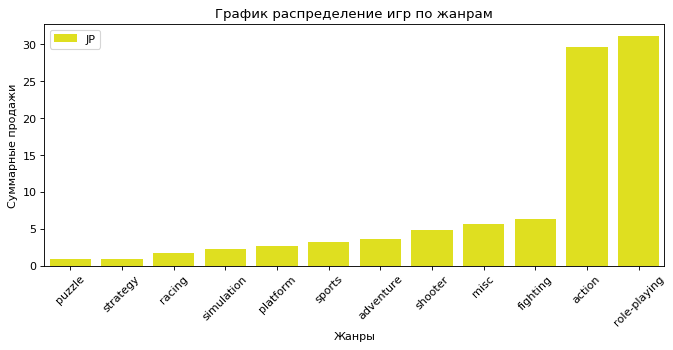

In [48]:
plt.figure(figsize=(10,4), dpi= 80)
sns.barplot(x='genre', y='jp_sales', data=data_top_genre_JP, color='yellow',label='JP')
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Жанры')
plt.ylabel('Суммарные продажи')
plt.title('График распределение игр по жанрам')
plt.show()

#### Промежуточный вывод 2.:<a id='part42'></a>

* Топ 5 жанров для региона NA: **misc, role-playing, sports, action, shooter**
* Топ 5 жанров для региона EU: **racing, role-playing, sports, shooter, action**
* Топ 5 жанров для региона JP: **shooter, misc, fighting, action, role-playing**
* Разница в продажах игр EU и JP более чем в два раза. Разница между JP и NA в более чем в 4 раза.
* Японский рынок игр отличается в меньшую сторону от Северо-Американского и Европейского, причина в том что  количество жителей и соответственно пользователей платформ там намного меньше. 
* Отличие популярных жанров JP от NA и EU объясняется тем что менталитет и образ жизни у жителей страны восходящего солнца другой.


Проверим влияние рейтинга  ESRB на продажи в отдельном регионе

Создадим сборные таблицы по трем регионам

In [49]:
data_esrb_na = data.pivot_table(index='rating', values='na_sales', aggfunc='sum')
data_esrb_eu = data.pivot_table(index='rating', values='eu_sales', aggfunc='sum')
data_esrb_jp = data.pivot_table(index='rating', values='jp_sales', aggfunc='sum')

Построим графики по каждому региону

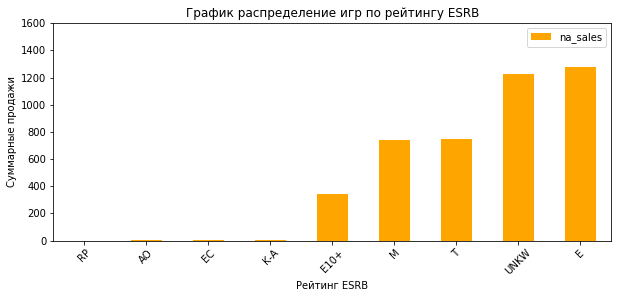

In [50]:
data_esrb_na = data_esrb_na.sort_values('na_sales')
data_esrb_na.plot(kind='bar', figsize=(10,4), color='orange', ylim=(0, 1600))
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Суммарные продажи')
plt.title('График распределение игр по рейтингу ESRB')
plt.show()

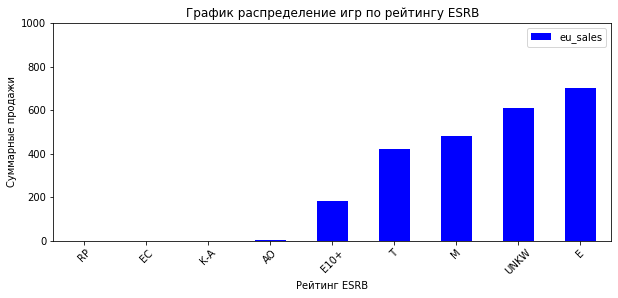

In [51]:
data_esrb_eu = data_esrb_eu.sort_values('eu_sales')
data_esrb_eu.plot(kind='bar', figsize=(10,4), color='blue', ylim=(0, 1000))
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Суммарные продажи')
plt.title('График распределение игр по рейтингу ESRB')
plt.show()

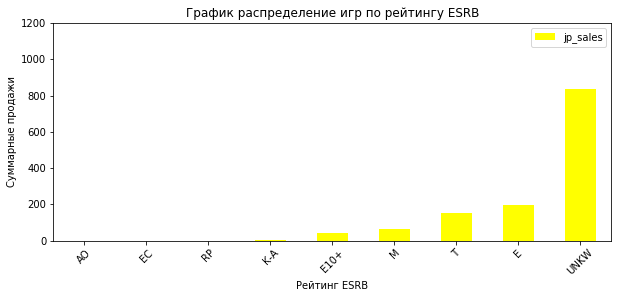

In [52]:
data_esrb_jp = data_esrb_jp.sort_values('jp_sales')
data_esrb_jp.plot(kind='bar', figsize=(10,4), color='yellow', ylim=(0, 1200))
plt.legend()
plt.xticks(rotation=45)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Суммарные продажи')
plt.title('График распределение игр по рейтингу ESRB')
plt.show()

#### Вывод:<a id='part43'></a>

* В регионах NA  EU графики похожи.
* В основном «K-A» = «E» - («Everyone») — «Для всех»: Содержание вполне подходит для возрастной категории от 6 лет и старше; такие игры могут понравиться и взрослым. Игры с этим рейтингом могут содержать минимальное насилие, в основном «мультяшного» характера. И игры без рейтинга UNKW.
* Рейтинг ESRB нужен больше производителям игр и они возможно делают массовым сегмент Е чтобы охватить большее количество пользователей.
* Очень вероятно что рейтинг ESRB не влияет на продажи так как является лишь предупреждением о содержании сцен в играх. Что в принципе и видно по количеству игр без рейтинга и с рейтингом Е как самым усредненным в системе ESRB.


[...](#parthead)

### Часть 5. Проверим гипотезы:<a id='part5'></a>

* Средние пользовательские рейтинги платформ Xbox One и PC одинаковые;
* Средние пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

Проверим гипотезу что пользовательские рейтинги платформ Xbox One и PC одинаковые.

Нулевая гипотеза - рейтинги одинаковые, иначе - рейтинги различаются.

In [53]:
# сделаем срезы данных по xone и ps
data_xone = data.query('platform == "xone"')
data_pc = data.query('platform == "pc"')

Работаем с рейтингами поэтому удалим строки с маркерами маяками пропусков

In [54]:
data_xone = data_xone.drop(data_xone[data_xone['user_score'] == -11].index)
data_xone = data_xone.drop(data_xone[data_xone['user_score'] == -1].index)

data_pc = data_pc.drop(data_pc[data_pc['user_score'] == -11].index)
data_pc = data_pc.drop(data_pc[data_pc['user_score'] == -1].index)

Вычислим дисперсию для выборок и вычислим их процентное соотношение для определения аргумента equal_var

In [55]:
# дисперсия  для пользовательского рейтинга xone и pc
var_mean_data_xone = np.var(data_xone['user_score'], ddof=1)
var_mean_data_pc = np.var(data_pc['user_score'], ddof=1)

# критический уровень статистической значимости примем:
alpha = 0.05

# находим большее из двух чисел
max_ab =  max([var_mean_data_xone,var_mean_data_pc])
min_ab =  min([var_mean_data_xone,var_mean_data_pc])

# вычисляем процентное соотношение двух дисперсий и проверяем на условие
results =  (max_ab - min_ab) / max_ab

print('Значение:', results)

# условие для опровержения или принятия равенства по условию
if (results > alpha):
    print('Отвергаем равенство, используем аргумент False ')
else:
    print('Не получилось отвергнуть равенство, используем аргумент True ')

Значение: 0.1882440591168804
Отвергаем равенство, используем аргумент False 


In [56]:
# проверим гипотезу о равенстве средних, двух генеральных совокупностей

# критический уровень статистической значимости
alpha = 0.05 

# вычисляем p-значение
results = st.ttest_ind(data_xone['user_score'], data_pc['user_score'], equal_var = False) 

print('p-значение:', results.pvalue)

# условие для опровержения или принятия нулевой гипотезы
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 4.5385802963771776e-06
Отвергаем нулевую гипотезу


#### Промежуточный вывод 1.<a id='part51'></a>
Отвергаем нулевую гипотезу, значит наша гипотеза о равенстве средних пользовательского рейтинга платформ Xbox One и PC отвергнута.

Проверим гипотезу что пользовательские рейтинги жанров Action (англ. «действие», экшен-игры) и Sports (англ. «спортивные соревнования») разные.

In [57]:
# сделаем срезы данных по xone и ps
data_action = data.query('genre == "action"')
data_sports = data.query('genre == "sports"')

Очищаем данные от маркеров-маяков пропусков

In [58]:
data_action = data_action.drop(data_action[data_action['user_score'] == -11].index)
data_action = data_action.drop(data_action[data_action['user_score'] == -1].index)

data_sports = data_sports.drop(data_sports[data_sports['user_score'] == -11].index)
data_sports = data_sports.drop(data_sports[data_sports['user_score'] == -1].index)


Вычислим дисперсию для выборок и вычислим их процентное соотношение для определения аргумента equal_var

In [59]:
# дисперсия  для пользовательского рейтинга xone и pc
var_mean_data_action = np.var(data_action['user_score'], ddof=1)
var_mean_data_sports = np.var(data_sports['user_score'], ddof=1)

# критический уровень статистической значимости примем:
alpha = 0.05

# находим большее из двух чисел
max_ab =  max([var_mean_data_action,var_mean_data_sports])
min_ab =  min([var_mean_data_action,var_mean_data_sports])

# вычисляем процентное соотношение двух дисперсий и проверяем на условие
results =  (max_ab - min_ab) / max_ab

print('Значение:', results)

# условие для опровержения или принятия равенства по условию
if (results > alpha):
    print('Отвергаем равенство, используем аргумент False ')
else:
    print('Не получилось отвергнуть равенство, используем аргумент True ')

Значение: 0.22704894093914751
Отвергаем равенство, используем аргумент False 


In [60]:
# проверим гипотезу о равенстве средних, двух генеральных совокупностей

# критический уровень статистической значимости
alpha = 0.05 

# вычисляем p-значение
results = st.ttest_ind(data_action['user_score'], data_sports['user_score'], equal_var = False) 

print('p-значение:', results.pvalue)

# условие для опровержения или принятия нулевой гипотезы
if (results.pvalue < alpha):
    print("Отвергаем нулевую гипотезу")
else:
    print("Не получилось отвергнуть нулевую гипотезу")

p-значение: 0.07370217419278534
Не получилось отвергнуть нулевую гипотезу


#### Вывод:<a id='part52'></a>
Не получилось отвергнуть нулевую гипотезу. Полученное значение p-value говорит о том, что хотя пользовательские рейтинги жанров Action и Sports разные, с вероятностью в 10% такое или большее различие можно получить случайно. Это явно слишком большая вероятность, чтобы делать вывод о значимом различии между средними пользовательскими рейтингами двух жанров.
То есть считаем что наше утверждение что пользовательские рейтинги жанров Action  и Sports  разные, верно.

[...](#parthead)

### Общий вывод:<a id='part6'></a>

* Топ 5 платформ для региона NA: **ps3, 3ds, x360, xone, ps4**
* Топ 5 платформ для региона EU: **3ds, pc, ps3, xone, ps4**
* Топ 5 платформ для региона JP: **wiiu, ps3, psv, ps4, 3ds**
* В регионах лидеры разные, для Северной Америки и Европы **ps4**, для Японии **3ds**
* Платформа ps4 популярная в регионах EU и NA с большим отрывом от других платформ
* Доля продаж  для Японии и Европы и Северной Америки различается в несколько раз. Сказывается меньшее число жителей и соответсвенно меньшее число пользователей платформ в Японии.
* Топ 5 жанров для региона NA: **misc, role-playing, sports, action, shooter**
* Топ 5 жанров для региона EU: **racing, role-playing, sports, shooter, action**
* Топ 5 жанров для региона JP: **shooter, misc, fighting, action, role-playing**
* Отличие популярных жанров JP от NA и EU объясняется тем что менталитет и образ жизни у жителей страны восходящего солнца другой.
* Характерный период "жизни" платформы ~7 - 10 лет. после чего продажи игр для нее стремятся к нулю. Это нужно иметь ввиду и не использовать бесперспективные платформы.
* Рейтинг ESRB не влияет так явно на выбор игр в отличии от рейтинга критиков и пользователей, причем рейтинг критиков является более значимым и имеет сильно влияние на количество продаж, возможно покупатели больше доверяют авторитетному мнению критиков нежели мнению пользователей и тем более рейтингу ESRB, который лишь подсказывает о содержании контента в играх.


* Исходя из анализа данных о продажах игр можно выделить перспективные платформы и жанры.
* Перспективные платформы **1 - ps4, 2 - xone, 3 - 3ds**
* Популярные жанры: **1 - shooter, 2 - action, 3 - sports**

Можно рекомендовать обратить внимание на эти платформы и жанры для перспектив развития.